In [ ]:
from skimage.io import imread,imshow
from skimage.color import gray2rgb
import matplotlib.pyplot as plt
import cv2

from google.colab import drive


In [ ]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Convert the image into grayscale (if not already)
img = imread('/content/drive/MyDrive/MV /chessboard.jpg')
#import imageio as iio

# read an image
#img = iio.imread("/content/chessboard.png")

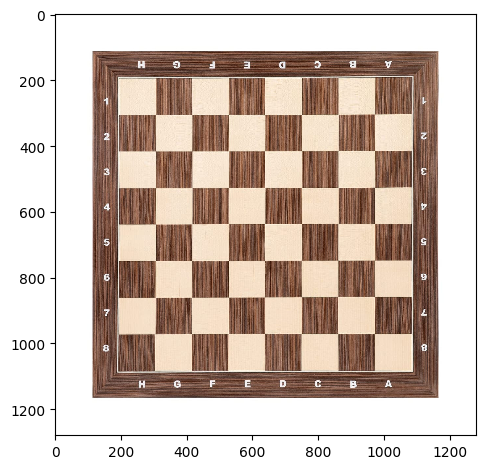

In [ ]:
imshow(img)

In [ ]:
from skimage.color import rgb2gray
img=rgb2gray(img)

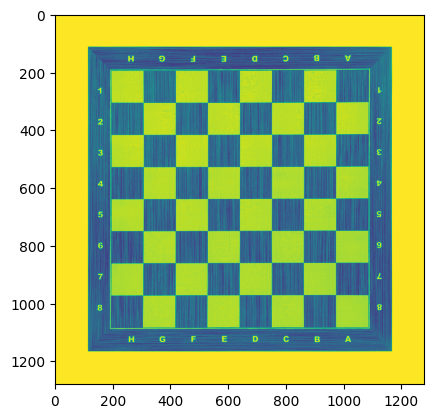

In [ ]:
plt.imshow(img)

In [ ]:
#Spatial derivative calculation
from scipy import signal as sig
import numpy as np
from scipy import ndimage as ndi
from skimage.feature import corner_harris, corner_peaks


In [ ]:
import numpy as np
import scipy.signal as sig

def gradient_x(img):
    kernel_x = np.array([[-1, 0, 1],
                         [-2, 0, 2],
                         [-1, 0, 1]])
    return sig.convolve2d(img, kernel_x, mode='same')

def gradient_y(img):
    kernel_y = np.array([[1, 2, 1],
                         [0, 0, 0],
                         [-1, -2, -1]])
    return sig.convolve2d(img, kernel_y, mode='same')

# Example usage
img = np.random.rand(10, 10)  # Example random image
I_x = gradient_x(img)
I_y = gradient_y(img)


In [ ]:
img = gray2rgb(img)
img.shape

(10, 10, 3)

In [ ]:
# Structure tensor setup
Ixx=ndi.gaussian_filter(I_x**2,sigma=1)
Ixy=ndi.gaussian_filter(I_y*I_x,sigma=1)
Iyy=ndi.gaussian_filter(I_y**2,sigma=1)

In [ ]:
# Harris response calculation

k=0.05
# determinant
detA=Ixx*Iyy-Ixy**2
# trace
traceA=Ixx+Iyy
harris_response=detA-k*traceA**2
img_copy_for_corners=np.copy(img)
img_copy_for_edges=np.copy(img)

In [ ]:
for rowindex,response in enumerate(harris_response):
 for colindex,r in enumerate(response):
   if r>0:
# this is a corner
     img_copy_for_corners[rowindex,colindex]=[255,0,0]
   elif r<0:
# this is an edge
     img_copy_for_edges[rowindex,colindex]=[0,255,0]


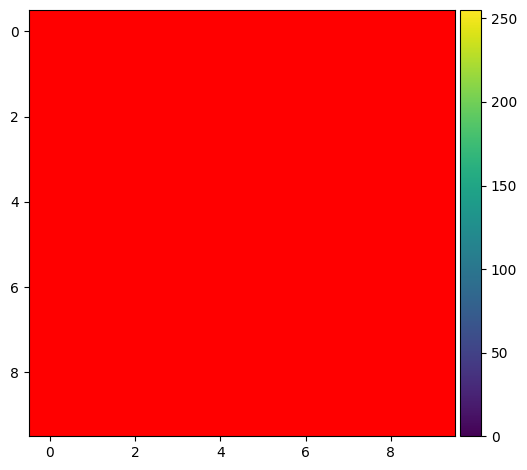

In [ ]:
imshow(img_copy_for_corners)


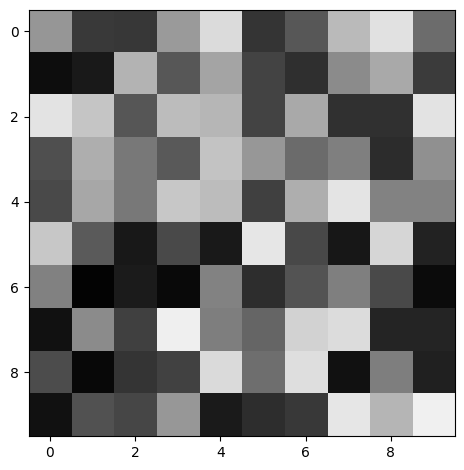

In [ ]:
imshow(img_copy_for_edges)